<a href="https://colab.research.google.com/github/facundodelga/IA/blob/main/mamdani1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=c42bbfb6cebf394c59a02be914ae098b04b583afd42789aaf64e7ed575268219
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz



Un sistema de inferencia difuso con una sola entrada y una única salida se describe mediante las siguientes reglas:  

*   SI 𝒙 ES pequeño ENTONCES 𝒚 es pequeño
*   SI 𝒙 ES mediano ENTONCES 𝒚 es mediano
*   SI 𝒙 ES grande ENTONCES 𝒚 es grande


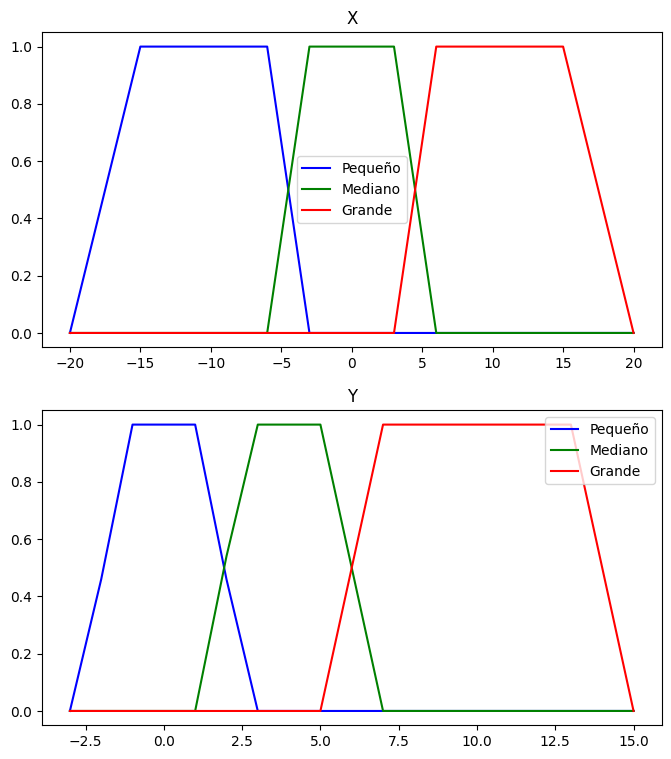

In [ ]:
# defino el rango de las variables de entrada y de salida
x = np.arange(-20,21,1)
y = np.arange(-3,16,1)

#defino las funciones de pertenencia de las variables de entrada

x_lil = fuzz.trapmf(x,[-20, -15, -6, -3])
x_mid = fuzz.trapmf(x,[-6, -3, 3, 6])
x_hig = fuzz.trapmf(x,[3, 6, 15, 20])

#defino las funciones de pertenencia de las variables de salida

y_lil = fuzz.trapmf(y,[-2.46, -1.46, 1.46, 2.46])
y_mid = fuzz.trapmf(y,[1.46, 2.46, 5, 7])
y_hig = fuzz.trapmf(y,[5, 7, 13, 15])

fig, (ax, ay) = plt.subplots(nrows=2, figsize=(8, 9))

ax.plot(x, x_lil, 'b', linewidth=1.5, label='Pequeño')
ax.plot(x, x_mid, 'g', linewidth=1.5, label='Mediano')
ax.plot(x, x_hig, 'r', linewidth=1.5, label='Grande')
ax.set_title('X')
ax.legend()

ay.plot(y, y_lil, 'b', linewidth=1.5, label='Pequeño')
ay.plot(y, y_mid, 'g', linewidth=1.5, label='Mediano')
ay.plot(y, y_hig, 'r', linewidth=1.5, label='Grande')
ay.set_title('Y')
ay.legend()



Text(0.5, 1.0, 'Fuzzyficado')

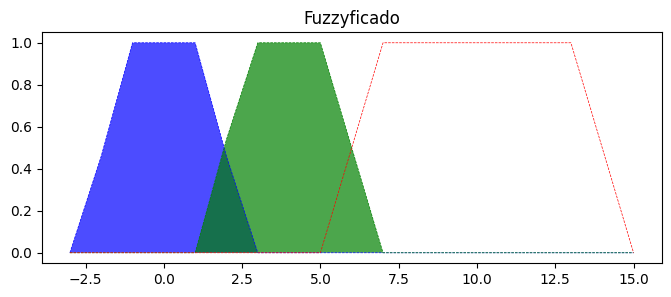

In [ ]:
#Valor de entrada de X

valor_x = 8

x_level_lil = fuzz.interp_membership(x,x_lil,valor_x)
x_level_mid = fuzz.interp_membership(x,x_mid,valor_x)
x_level_hig = fuzz.interp_membership(x,x_hig,valor_x)

#asigno las reglas

regla1 = np.fmin(1 - x_level_lil,y_lil) #SI 𝒙 ES pequeño ENTONCES 𝒚 es pequeño
regla2 = np.fmin(1 - x_level_mid,y_mid) #SI 𝒙 ES mediano ENTONCES 𝒚 es mediano
regla3 = np.fmin(1 - x_level_hig,y_hig) #SI 𝒙 ES grande ENTONCES 𝒚 es grande

#visualizar las reglas

fig, ax = plt.subplots(figsize=(8, 3))

ax.fill_between(y, regla1, facecolor='b', alpha=0.7)
ax.plot(y, y_lil, 'b', linewidth=0.5, linestyle='--', )

ax.fill_between(y, regla2, facecolor='g', alpha=0.7)
ax.plot(y, y_mid, 'g', linewidth=0.5, linestyle='--')

ax.fill_between(y, regla3, facecolor='r', alpha=0.7)
ax.plot(y, y_hig, 'r', linewidth=0.5, linestyle='--')

ax.set_title('Fuzzyficado')



Text(0.5, 1.0, 'Aggregated membership and result (line)')

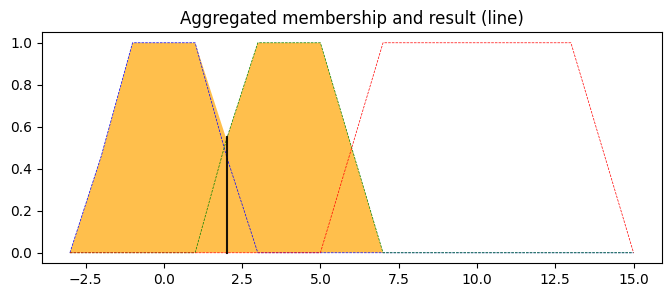

In [ ]:
# Agregacion de todas las reglas

aggregation = np.fmax(regla1,np.fmax(regla2,regla3))

# Calculo del resultado defuzzificado

salida = fuzz.defuzz(y,aggregation,'centroid')

salida_activada = fuzz.interp_membership(y, aggregation, salida)

# Visualizacion de los resultados

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(y, y_lil, 'b', linewidth=0.5, linestyle='--', )
ax.plot(y, y_mid, 'g', linewidth=0.5, linestyle='--')
ax.plot(y, y_hig, 'r', linewidth=0.5, linestyle='--')
ax.fill_between(y,aggregation, facecolor='Orange', alpha=0.7)
ax.plot([salida, salida], [0, salida_activada], 'k', linewidth=1.5, alpha=0.9)
ax.set_title('Aggregated membership and result (line)')